In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Data from United States Department of Agriculture (USDA) Economic Research Service, Data Products, [Commodity Costs and Returns](https://www.ers.usda.gov/data-products/commodity-costs-and-returns/commodity-costs-and-returns/#Historical%20Costs%20and%20Returns:%20Soybeans).
  
- pstatement
- time series-- previous $ to account for predictable +random shock; forecast external factors
- seasonality
- prioritize baseline model with few predictors/ min viable product (seasonality)

In [2]:
df = pd.read_csv('../Data/SoybeansCostReturn.csv')

In [4]:
df

,Commodity,CommodityId,Category,CategoryId,Item,Item2,ItemId,Units,UnitsAbr,UnitsId,Region,RegionId,Country,CountryId,Year,Value,SurveyBaseYear,Note,Order
0,Soybean,80,Gross value of production,1,Primary product soybeans,Primary product soybeans,37,dollars per planted acre,$ / planted ac,10,U.S. total,10,United States,10,1997,281.22,Base survey of 1997,NaN,60
1,Soybean,80,Gross value of production,1,Primary product soybeans,Primary product soybeans,37,dollars per planted acre,$ / planted ac,10,U.S. total,10,United States,10,1998,223.17,Base survey of 1997,NaN,60
2,Soybean,80,Gross value of production,1,Primary product soybeans,Primary product soybeans,37,dollars per planted acre,$ / planted ac,10,U.S. total,10,United States,10,1999,178.00,Base survey of 1997,NaN,60
3,Soybean,80,Gross value of production,1,Primary product soybeans,Primary product soybeans,37,dollars per planted acre,$ / planted ac,10,U.S. total,10,United States,10,2000,182.45,Base survey of 1997,NaN,60
4,Soybean,80,Gross value of production,1,Primary product soybeans,Primary product soybeans,37,dollars per planted acre,$ / planted ac,10,U.S. total,10,United States,10,2001,178.62,Base survey of 1997,NaN,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,Soybean,80,Production practices,7,Irrigated,Irrigated (percent of acres),1190,percent of acres,% of ac,70,Mississippi Portal,100,United States,10,2014,50.00,Base survey of 2012,NaN,1360
4572,Soybean,80,Production practices,7,Irrigated,Irrigated (percent of acres),1190,percent of acres,% of ac,70,Mississippi Portal,100,United States,10,2015,50.00,Base survey of 2012,NaN,1360
4573,Soybean,80,Production practices,7,Irrigated,Irrigated (percent of acres),1190,percent of acres,% of ac,70,Mississippi Portal,100,United States,10,2016,50.00,Base survey of 2012,NaN,1360
4574,Soybean,80,Production practices,7,Irrigated,Irrigated (percent of acres),1190,percent of acres,% of ac,70,Mississippi Portal,100,United States,10,2017,50.00,Base survey of 2012,NaN,1360


In [168]:
df.describe()

,CommodityId,CategoryId,ItemId,UnitsId,RegionId,CountryId,Year,Value,Order
count,4576.0,4576.000000,4576.000000,4576.000000,4576.000000,4576.0,4576.000000,4576.000000,4576.000000
mean,80.0,3.346154,814.884615,16.923077,47.500000,10.0,2007.500000,87.405435,958.461538
std,0.0,1.774851,235.357616,16.819693,27.274761,0.0,6.344982,126.728980,257.212450
min,80.0,1.000000,37.000000,10.000000,10.000000,10.0,1997.000000,-136.440000,60.000000
25%,80.0,2.000000,710.000000,10.000000,27.500000,10.0,2002.000000,8.717500,840.000000
50%,80.0,3.000000,865.000000,10.000000,45.000000,10.0,2007.500000,26.335000,1015.000000
75%,80.0,5.000000,950.000000,10.000000,62.500000,10.0,2013.000000,113.785000,1100.000000
max,80.0,7.000000,1190.000000,70.000000,100.000000,10.0,2018.000000,676.000000,1360.000000


In [169]:
df.columns

Index(['Commodity', 'CommodityId', 'Category', 'CategoryId', 'Item', 'Item2',
       'ItemId', 'Units', 'UnitsAbr', 'UnitsId', 'Region', 'RegionId',
       'Country', 'CountryId', 'Year', 'Value', 'SurveyBaseYear', 'Note',
       'Order'],
      dtype='object')

In [170]:
df['Value']

0       281.22
1       223.17
2       178.00
3       182.45
4       178.62
         ...  
4571     50.00
4572     50.00
4573     50.00
4574     50.00
4575     50.00
Name: Value, Length: 4576, dtype: float64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 19 columns):
Commodity         4576 non-null object
CommodityId       4576 non-null int64
Category          4576 non-null object
CategoryId        4576 non-null int64
Item              4576 non-null object
Item2             4576 non-null object
ItemId            4576 non-null int64
Units             4576 non-null object
UnitsAbr          4576 non-null object
UnitsId           4576 non-null int64
Region            4576 non-null object
RegionId          4576 non-null int64
Country           4576 non-null object
CountryId         4576 non-null int64
Year              4576 non-null int64
Value             4576 non-null float64
SurveyBaseYear    4576 non-null object
Note              176 non-null object
Order             4576 non-null int64
dtypes: float64(1), int64(8), object(10)
memory usage: 679.4+ KB


In [172]:
df['Note'].unique()

array([nan,
       'ᵃ  Cost of commercial fertilizers, soil conditioners, and manure.'],
      dtype=object)

In [173]:
df[df['Note'].notnull()]

,Commodity,CommodityId,Category,CategoryId,Item,Item2,ItemId,Units,UnitsAbr,UnitsId,Region,RegionId,Country,CountryId,Year,Value,SurveyBaseYear,Note,Order
528,Soybean,80,Operating costs,2,Fertilizer ᵃ,Fertilizer ᵃ,590,dollars per planted acre,$ / planted ac,10,U.S. total,10,United States,10,1997,8.96,Base survey of 1997,"ᵃ Cost of commercial fertilizers, soil condit...",740
529,Soybean,80,Operating costs,2,Fertilizer ᵃ,Fertilizer ᵃ,590,dollars per planted acre,$ / planted ac,10,U.S. total,10,United States,10,1998,8.90,Base survey of 1997,"ᵃ Cost of commercial fertilizers, soil condit...",740
530,Soybean,80,Operating costs,2,Fertilizer ᵃ,Fertilizer ᵃ,590,dollars per planted acre,$ / planted ac,10,U.S. total,10,United States,10,1999,8.85,Base survey of 1997,"ᵃ Cost of commercial fertilizers, soil condit...",740
531,Soybean,80,Operating costs,2,Fertilizer ᵃ,Fertilizer ᵃ,590,dollars per planted acre,$ / planted ac,10,U.S. total,10,United States,10,2000,8.85,Base survey of 1997,"ᵃ Cost of commercial fertilizers, soil condit...",740
532,Soybean,80,Operating costs,2,Fertilizer ᵃ,Fertilizer ᵃ,590,dollars per planted acre,$ / planted ac,10,U.S. total,10,United States,10,2001,9.52,Base survey of 1997,"ᵃ Cost of commercial fertilizers, soil condit...",740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Soybean,80,Operating costs,2,Fertilizer ᵃ,Fertilizer ᵃ,590,dollars per planted acre,$ / planted ac,10,Mississippi Portal,100,United States,10,2014,36.01,Base survey of 2012,"ᵃ Cost of commercial fertilizers, soil condit...",740
700,Soybean,80,Operating costs,2,Fertilizer ᵃ,Fertilizer ᵃ,590,dollars per planted acre,$ / planted ac,10,Mississippi Portal,100,United States,10,2015,33.44,Base survey of 2012,"ᵃ Cost of commercial fertilizers, soil condit...",740
701,Soybean,80,Operating costs,2,Fertilizer ᵃ,Fertilizer ᵃ,590,dollars per planted acre,$ / planted ac,10,Mississippi Portal,100,United States,10,2016,28.28,Base survey of 2012,"ᵃ Cost of commercial fertilizers, soil condit...",740
702,Soybean,80,Operating costs,2,Fertilizer ᵃ,Fertilizer ᵃ,590,dollars per planted acre,$ / planted ac,10,Mississippi Portal,100,United States,10,2017,25.42,Base survey of 2012,"ᵃ Cost of commercial fertilizers, soil condit...",740


In [174]:
df['Country'].unique() #just US data

array(['United States'], dtype=object)

In [175]:
df['Category'].unique()

array(['Gross value of production', 'Operating costs',
       'Allocated overhead', 'Costs listed', 'Net',
       'Supporting information', 'Production practices'], dtype=object)

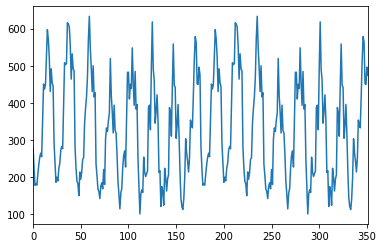

In [176]:
df[df['Category']=='Gross value of production']['Value'].plot()


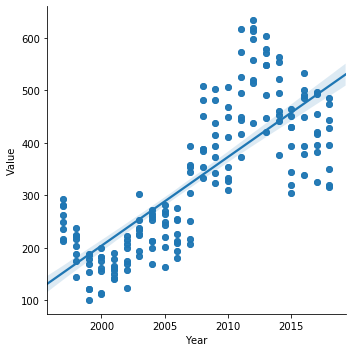

In [177]:
sns.lmplot(x = 'Year', y='Value', data=df[df['Category']=='Gross value of production'])

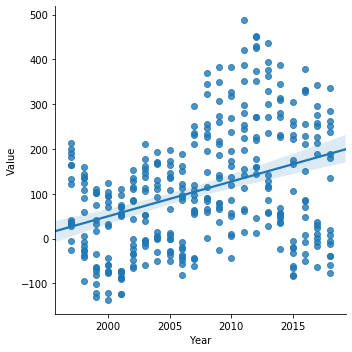

In [178]:
sns.lmplot(x = 'Year', y='Value', data=df[df['Category']=='Net'])

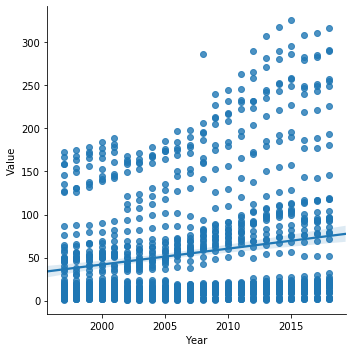

In [179]:
sns.lmplot(x = 'Year', y='Value', data=df[df['Category']=='Allocated overhead'])

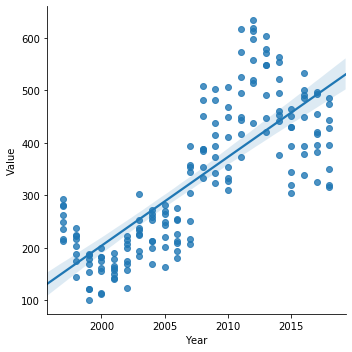

In [180]:
sns.lmplot(x = 'Year', y='Value', data=df[df['Item']=='Total, gross value of production'])

In [181]:
df['Item'].unique()

array(['Primary product soybeans', 'Total, gross value of production',
       'Seed', 'Fertilizer ᵃ ', 'Chemicals', 'Custom services',
       'Fuel, lube, and electricity', 'Repairs',
       'Purchased irrigation water', 'Interest on operating capital',
       'Total, operating costs', 'Hired labor',
       'Opportunity cost of unpaid labor',
       'Capital recovery of machinery and equipment',
       'Opportunity cost of land', 'Taxes and insurance',
       'General farm overhead', 'Total, allocated overhead',
       'Total, costs listed',
       'Value of production less total costs listed',
       'Value of production less operating costs', 'Yield', 'Price',
       'Enterprise size', 'Dryland', 'Irrigated'], dtype=object)

In [182]:
df['Year'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [183]:
df.groupby(['Year', 'Category']).mean()['Value']

Year  Category                 
1997  Allocated overhead            42.540714
      Costs listed                 230.818750
      Gross value of production    253.682500
      Net                           97.004375
      Operating costs               18.205833
                                      ...    
2018  Gross value of production    401.576250
      Net                          104.701250
      Operating costs               37.078056
      Production practices          50.000000
      Supporting information       121.760000
Name: Value, Length: 154, dtype: float64

In [184]:
df_2 = pd.read_csv('CMOHistoricalDataMonthly_worldbank_soybeans.csv')
df_2.head()

,Unnamed: 0,SOYBEANS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1960M01,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960M02,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960M03,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960M04,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960M05,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df_2.columns

Index(['Unnamed: 0', 'SOYBEANS', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [186]:
df_2.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'], inplace = True)

In [187]:
df_2.drop(index = df_2[df_2['SOYBEANS'].isnull()].index, inplace = True)

In [188]:
df_2

,Unnamed: 0,SOYBEANS
0,1960M01,94.00
1,1960M02,91.00
2,1960M03,92.00
3,1960M04,93.00
4,1960M05,93.00
...,...,...
716,2019M09,366.07
717,2019M10,381.65
718,2019M11,375.59
719,2019M12,375.92


In [189]:
test = pd.DataFrame([df_2['Unnamed: 0'][i].split('M') for i in df_2.index])

In [190]:
test

,0,1
0,1960,01
1,1960,02
2,1960,03
3,1960,04
4,1960,05
...,...,...
716,2019,09
717,2019,10
718,2019,11
719,2019,12


In [191]:
df_2['year'] = test[0]
df_2['month'] = test[1]

In [192]:
df_2

,Unnamed: 0,SOYBEANS,year,month
0,1960M01,94.00,1960,01
1,1960M02,91.00,1960,02
2,1960M03,92.00,1960,03
3,1960M04,93.00,1960,04
4,1960M05,93.00,1960,05
...,...,...,...,...
716,2019M09,366.07,2019,09
717,2019M10,381.65,2019,10
718,2019M11,375.59,2019,11
719,2019M12,375.92,2019,12


In [193]:
df_2.drop(columns = ['Unnamed: 0'], inplace = True)

In [194]:
df_2.rename(columns = {'SOYBEANS': 'price'}, inplace = True)

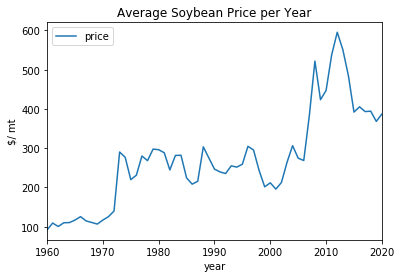

In [195]:
df_2.groupby(['year']).mean().plot()
plt.title('Average Soybean Price per Year')
plt.ylabel('$/ mt');

In [196]:
annual_max = df_2.groupby(['year']).max()
annual_min = df_2.groupby(['year']).min()

In [ ]:
annual_max.index.unique()

In [ ]:
df_prod = pd.read_csv('FAOSTAT_data_2-18-2020.csv')

In [ ]:
df_prod.head()

In [ ]:
df_prod.info()

In [ ]:
df_prod['Area'].unique()

In [ ]:
df_prod.groupby(['Area', 'Year']).sum()

In [6]:
daily = pd.read_csv('S00-USA-csv.csv')
daily.head()

FileNotFoundError: [Errno 2] File b'S00-USA-csv.csv' does not exist: b'S00-USA-csv.csv'

In [199]:
daily.dtypes

Date                 object
Last                 object
Settlement Price    float64
Change              float64
% Change            float64
Bid                 float64
Ask                 float64
Open Interest        object
Volume               object
dtype: object

In [200]:
daily['Date'] = pd.to_datetime(daily['Date'])

In [201]:
# Set Date to be in the index
daily.set_index('Date', inplace=True)
daily.head()

,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,Volume
Date,,,,,,,,
2020-02-18,8.932,8.938,0.000,0.00,8.930,8.932,"210,942.000","106,223.000"
2020-02-14,8.927,8.938,-0.025,-0.28,8.927,8.930,"232,144.000","130,575.000"
2020-02-13,8.958,8.962,0.037,0.42,8.955,8.960,"250,088.000","193,428.000"
2020-02-12,8.920,8.925,0.078,0.88,8.920,8.922,"277,418.000","163,370.000"
2020-02-11,8.850,8.847,0.005,0.06,8.850,8.852,"298,204.000","134,299.000"


In [202]:
# Sort the index
daily.sort_index(inplace=True)
daily.head()

,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,Volume
Date,,,,,,,,
1990-01-02,5.613,5.613,-0.067,-1.19,NaN,NaN,NaN,NaN
1990-01-03,5.673,5.673,0.060,1.07,NaN,NaN,NaN,NaN
1990-01-04,5.633,5.633,-0.040,-0.71,NaN,NaN,NaN,NaN
1990-01-05,5.645,5.645,0.012,0.22,NaN,NaN,NaN,NaN
1990-01-08,5.707,5.707,0.063,1.11,NaN,NaN,NaN,NaN


In [203]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7591 entries, 1990-01-02 to 2020-02-18
Data columns (total 8 columns):
Last                7582 non-null object
Settlement Price    7591 non-null float64
Change              7591 non-null float64
% Change            7591 non-null float64
Bid                 2511 non-null float64
Ask                 2489 non-null float64
Open Interest       4796 non-null object
Volume              4798 non-null object
dtypes: float64(5), object(3)
memory usage: 533.7+ KB


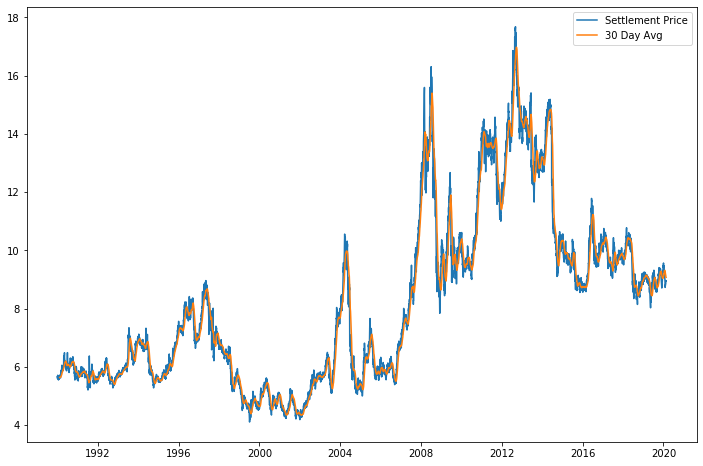

In [204]:
plt.figure(figsize=(12, 8))
plt.plot(daily['Settlement Price'], label='Settlement Price')
plt.plot(daily['Settlement Price'].rolling(30).mean(), label='30 Day Avg')
plt.legend()

In [205]:
av_daily_price = daily['Settlement Price']

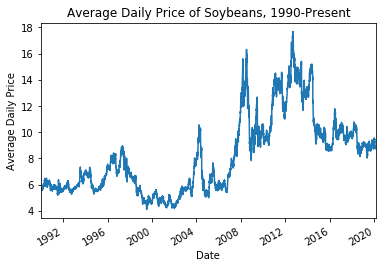

In [206]:
av_daily_price.plot()
plt.ylabel('Average Daily Price')
plt.title('Average Daily Price of Soybeans, 1990-Present');

In [207]:
# Write function called plot_series that takes in 
# a dataframe, a list of column names to plot, the 
# plot title and the axis labels as arguments,
# then displays the line plot with a figure size
# of 18 horizontal inches by 9 vertical inches.

# Matthew Garton - BOS

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

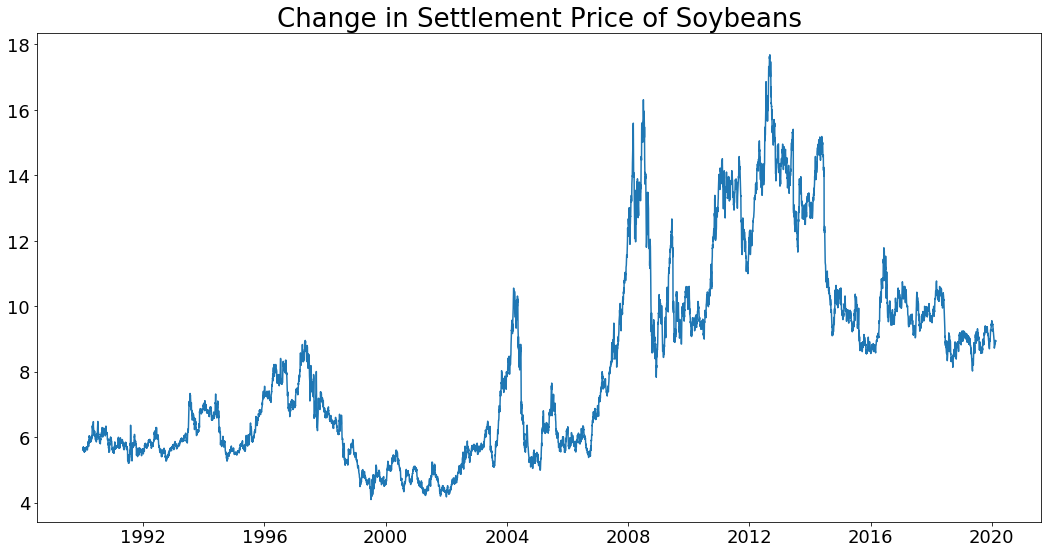

In [208]:
plot_series(daily, ['Settlement Price'],
            title = 'Change in Settlement Price of Soybeans')

In [209]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7591 entries, 1990-01-02 to 2020-02-18
Data columns (total 8 columns):
Last                7582 non-null object
Settlement Price    7591 non-null float64
Change              7591 non-null float64
% Change            7591 non-null float64
Bid                 2511 non-null float64
Ask                 2489 non-null float64
Open Interest       4796 non-null object
Volume              4798 non-null object
dtypes: float64(5), object(3)
memory usage: 533.7+ KB


In [210]:
daily['Settlement Price']

Date
1990-01-02    5.613
1990-01-03    5.673
1990-01-04    5.633
1990-01-05    5.645
1990-01-08    5.707
              ...  
2020-02-11    8.847
2020-02-12    8.925
2020-02-13    8.962
2020-02-14    8.938
2020-02-18    8.938
Name: Settlement Price, Length: 7591, dtype: float64

In [211]:
sett_price = pd.DataFrame(av_daily_price)
sett_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7591 entries, 1990-01-02 to 2020-02-18
Data columns (total 1 columns):
Settlement Price    7591 non-null float64
dtypes: float64(1)
memory usage: 118.6 KB


In [212]:
sett_price.head()

,Settlement Price
Date,
1990-01-02,5.613
1990-01-03,5.673
1990-01-04,5.633
1990-01-05,5.645
1990-01-08,5.707


In [213]:
from statsmodels.tsa.seasonal import seasonal_decompose

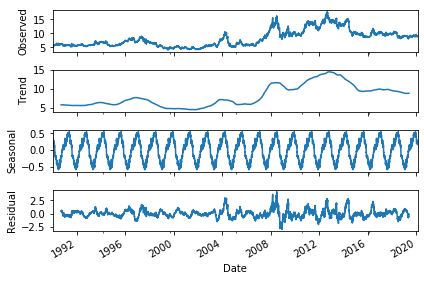

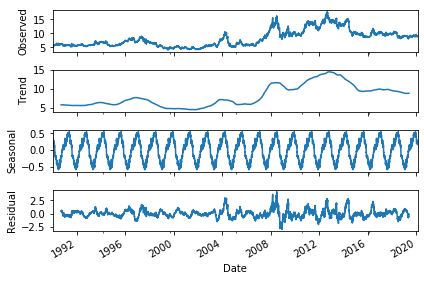

In [214]:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(daily['Settlement Price'], freq=360) #monthly = 12*30

# Plot the decomposed time series.
decomp.plot()

In [215]:
# Import the autocorrelation function (ACF) plot.
from statsmodels.graphics.tsaplots import plot_acf

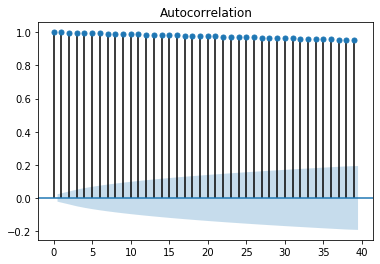

In [216]:
plot_acf(daily['Settlement Price']); #odd!

In [217]:
# Import the partial autocorrelation function (PACF) plot.
from statsmodels.graphics.tsaplots import plot_pacf

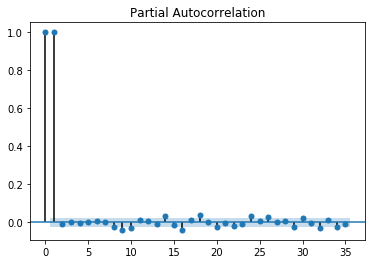

In [218]:
# Generate the PACF plot on CO2 data
# up to 20 time periods.
plot_pacf(daily['Settlement Price'], lags = 35);

In [219]:
# Dickey-Fuller Test; Import package and automate the testing process
from statsmodels.tsa.stattools import adfuller
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [221]:
interpret_dftest(adfuller(daily['Settlement Price']))

Test Statistic   -2.287341
p-value           0.176083
dtype: float64

In [1]:
# Create a column called `lag_1` that lags Passengers by one month.
daily['lag_30'] = daily['Settlement Price'].shift(30)

# Create a column called `lag_2` that lags Passengers by two months.
daily['lag_60'] = daily['Settlement Price'].shift(60)

# Create a column called `lag_1` that lags Passengers by three months.
daily['lag_90'] = daily['Settlement Price'].shift(90)

# Create a column called `lag_2` that lags Passengers by two months.
daily['lag_120'] = daily['Settlement Price'].shift(120)


# Create a column called `seasonal_12` that lags Passengers by one year.
daily['seasonal_360'] = daily['Settlement Price'].shift(360)

# Create a variable called `time` that takes on a value of 0 in January 1949,
# then increases by 1 each day until the end of the dataframe.
daily['time'] = range(0, daily.shape[0])

NameError: name 'daily' is not defined

In [2]:
daily.head()

NameError: name 'daily' is not defined

In [3]:
daily.tail()

NameError: name 'daily' is not defined

In [4]:
# Generate train/test split.
X_train, X_test, y_train, y_test = train_test_split(daily[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'seasonal_12', 'time']],
                                                    daily['Settlement Price'],
                                                    test_size = 0.3,
                                                   shuffle = False)

NameError: name 'train_test_split' is not defined

In [5]:
# Import statsmodels.
import statsmodels.api as sm

In [6]:
# Before fitting a model in statsmodels, what do we need
# to do? (Hint: Think intercept.)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Confirm.
X_train.head()

NameError: name 'X_train' is not defined

In [155]:
# statsmodels won't be able to handle missing values.

X_train.dropna(inplace=True)
y_train = y_train[X_train.index] 

# This way we subset y_train to keep only indices from X_train.

In [156]:
# Remember that, in statsmodels, we pass our data 
# in when we instantiate the model!

lm = sm.OLS(y_train, X_train)

In [157]:
# Then we fit our model.
lm_results = lm.fit()

In [158]:
# Display our summary!
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:       Settlement Price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.618e+05
Date:                Wed, 19 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:09:49   Log-Likelihood:                 3425.9
No. Observations:                5301   AIC:                            -6838.
Df Residuals:                    5294   BIC:                            -6792.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0070      0.006      1.207      

In [159]:
# Generate predicted test values.
lm_results.predict(X_test)

Date
2011-01-28    13.986953
2011-01-31    13.979688
2011-02-01    14.128671
2011-02-02    14.378027
2011-02-03    14.441626
                ...    
2020-02-11     8.853108
2020-02-12     8.858187
2020-02-13     8.936425
2020-02-14     8.973852
2020-02-18     8.950449
Length: 2278, dtype: float64

In [160]:
# Import R2 score and MSE.
from sklearn.metrics import r2_score, mean_squared_error

In [161]:
# Calculate R2 score.
r2_score(y_test, lm_results.predict(X_test))

0.9951217010176656

In [162]:
# Calculate RMSE.
mean_squared_error(y_test, lm_results.predict(X_test)) ** 0.5

0.1579414105842711

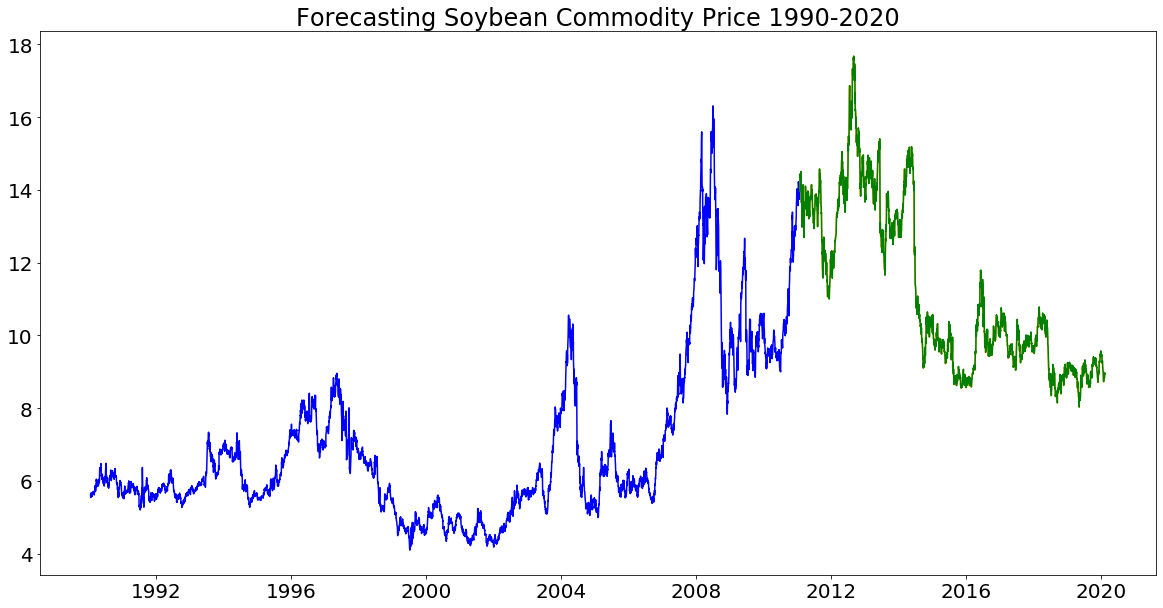

In [163]:
# Let's plot our predictions! 

# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green')

# Set label.
plt.title(label = 'Forecasting Soybean Commodity Price 1990-2020', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);